In [1]:
from npc_sessions import DynamicRoutingSession, get_sessions
import npc_sessions.utils.stim as stim
import npc_sessions.utils as utils
from matplotlib import pyplot as plt
import numpy as np
import datetime
import os
import itertools

In [7]:
def get_audio_latencies(session):
    task_stim = next(s for s in session.stim_paths if 'DynamicRouting' in s.stem)

    #get nidaq latencies
    lat_nidaq_env = stim.get_stim_latencies_from_nidaq_recording(
        task_stim,
        session.sync_path,
        session.ephys_recording_dirs,
        'audio',
        use_envelope=True,
    )

    lat_nidaq_sig = stim.get_stim_latencies_from_nidaq_recording(
        task_stim,
        session.sync_path,
        session.ephys_recording_dirs,
        'audio',
        use_envelope=False,
    )

    lat_nidaq_sig_list = [y.latency for y in lat_nidaq_sig if y is not None]
    lat_nidaq_env_list = [y.latency for y in lat_nidaq_env if y is not None]

    audtridx=[]
    for ii,lat in enumerate(lat_nidaq_sig):
        if lat is not None:
            audtridx.append(ii)

    #get sync latencies
    if session.sync_data.start_time.date() >= datetime.date(year=2023,month=8,day=31):
        sync_sound_on=True
    else:
        sync_sound_on=False

    if sync_sound_on:
        sync_line = stim.get_sync_line_for_stim_onset(
            "audio", session.sync_data.start_time.date()
        )

        lat_sync =  stim.get_stim_latencies_from_sync(
            task_stim,
            session.sync_path,
            "audio",
            sync_line
        )

        lat_sync_list = [y.latency for y in lat_sync if y is not None]
        audtridx_sync=[]
        for ii,lat in enumerate(lat_sync):
            if lat is not None:
                audtridx_sync.append(ii)

    latency_info = {
        'nidaq_signal':lat_nidaq_sig_list,
        'nidaq_envelope':lat_nidaq_env_list,
        'aud_trial_idx':audtridx,
        'sync_sound_on':sync_sound_on,
    }

    if sync_sound_on:
        latency_info['sync']=lat_sync_list
        latency_info['aud_trial_idx_sync']=audtridx_sync


    return latency_info

def plot_audio_latencies(session,latency_info):

    xbins=np.arange(-0.15,0.15,0.001)
    fig,ax=plt.subplots(2,1)
    ax[0].plot(latency_info['aud_trial_idx'],latency_info['nidaq_signal'],'.',alpha=0.5)
    ax[0].plot(latency_info['aud_trial_idx'],latency_info['nidaq_envelope'],'.',alpha=0.5)

    ax[0].set_xlabel('trial number')
    ax[0].set_ylabel('audio latency (s)')

    ax[1].hist(latency_info['nidaq_signal'],bins=xbins,alpha=0.5)
    ax[1].hist(latency_info['nidaq_envelope'],bins=xbins,alpha=0.5)

    ax[1].set_xlabel('audio latency (s)')
    ax[1].set_ylabel('trial count')
    ax[1].legend(['signal','envelope'])

    if latency_info['sync_sound_on']==True:
        ax[0].plot(latency_info['aud_trial_idx_sync'],latency_info['sync'],'.',alpha=0.5)
        ax[1].hist(latency_info['sync'],bins=xbins,alpha=0.5)
        ax[1].legend(['signal','envelope','sync'])

    if 'templeton' in session.task_version:
        figtitle='Audio latency by alignment method: '+session.id+' (templeton)'
    else:
        figtitle='Audio latency by alignment method: '+session.id+' (DR)'

    fig.suptitle(figtitle)
    fig.tight_layout()

    return fig


In [3]:
# session = DynamicRoutingSession('670248_2023-08-01') #templeton session, 
session = DynamicRoutingSession('670180_2023-07-27') #templeton session, 
# session = DynamicRoutingSession('668755_2023-08-31') #DR session, has sound on sync

takes 5-10 min per experiment

c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)


trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays


NameError: name 'sync_sound_on' is not defined

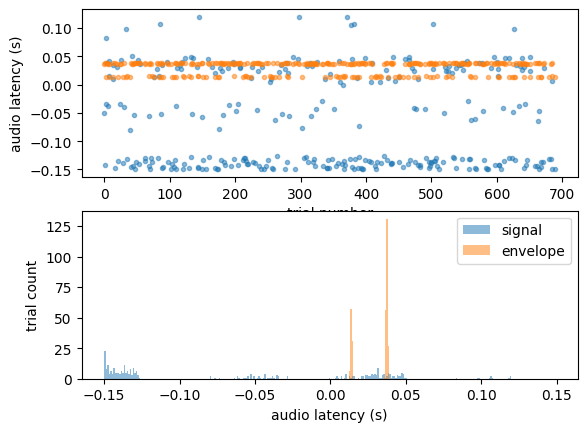

In [6]:
#plot single session
latency_info = get_audio_latencies(session)
fig = plot_audio_latencies(session,latency_info)

In [13]:
# np.std(latency_info['nidaq_signal'])
# np.std(latency_info['nidaq_envelope'])

np.any(np.array(latency_info['nidaq_signal'])<0)

True

In [14]:
all_latencies=[]
for session in get_sessions():
# x = get_sessions()
# y = itertools.islice(x,19,60)
# for session in y:
    try:
        
        latency_info = get_audio_latencies(session)
        fig = plot_audio_latencies(session,latency_info)

        savepath=os.path.join(r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR_QC_stuff\audio_latency",session.id+"_audio_latency.png")
        fig.savefig(savepath, dpi=300, format=None, metadata=None,
                    bbox_inches=None, pad_inches=0.1,
                    facecolor='auto', edgecolor='auto',
                    backend=None,
                )
        
        all_latencies[session.id]=latency_info

    except:
        continue
        


c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)


trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays


c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\DynamicRoutingTask\Analysis\DynamicRoutingAnalysisUtils.py:215: RuntimeWarning: invalid value encountered in scalar divide
  self.falseAlarmOtherModalGo.append(self.falseAlarmTrials[otherModalGo].sum() / otherModalGo.sum())


trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays
trialSoundArray empty; regenerating sound arrays


C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_37212\2955280717.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(2,1)
